# Word2Vec: Training & Visualisation

## Training

In [3]:
import re
import time
import glob
import logging

from collections import defaultdict

from gensim.models.word2vec import Word2Vec
from gensim.models.word2vec import LineSentence

In [4]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
corpus_path = "corpus/corpus_harrypotter/prepared.txt"
model_path = "results/model_harrypotter_w2v"

In [6]:
corpus = LineSentence(corpus_path)

# remove words that appear only once
frequency = defaultdict(int)
for text in corpus:
     for token in text:
        frequency[token] += 1

corpus = [[token for token in text if frequency[token] > 1]
         for text in corpus]

In [7]:
print (" ".join(corpus[0] + ["..."] + corpus[-1]))

harry potter and the sorcerer stone chapter one the boy who lived mr. and mrs. dursley of number four privet drive were proud say that they were perfectly normal thank you very much ... all was well


In [8]:
# Now train a model!

# Parameters (see http://radimrehurek.com/gensim/models/word2vec.html):

# Degree of parallelization. Requires cython installed.
workers = 4

# Size of the neural network layer that corresponds
# to the size of the output vector. A bigger size
# requires more training data, but can lead to more
# accurate results.
size = 120

# How often a token must appear in the corpus.
min_count = 5

# The size of the window. It is the maximum distance
# between the current and predicted word within a sentence.
window = 5

# Epochs. How often do we iterate over the corpus?
# If you really want to train something, use 15-20 epochs
epochs = 2

# Defines the training algorithm. By default (sg=0), 
# CBOW is used. Otherwise (sg=1), skip-gram is employed.
skip_gram = 0

# If > 0, negative sampling will be used, the int for 
# negative specifies how many “noise words” should be drawn
# (usually between 5-20). Default is 5.
# If set to 0, no negative samping is used.
negative = 5

t = time.time()

model = Word2Vec(
    sentences=corpus,
    workers=workers,
    size=size,
    min_count=min_count,
    window=window,
    iter=epochs,
    sg=skip_gram,
    negative=negative
)

model.save(model_path)

print("Trained model in %0.2f seconds." % (time.time() - t))

2017-01-12 16:26:02,674 : INFO : collecting all words and their counts
2017-01-12 16:26:02,679 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-01-12 16:26:02,729 : INFO : PROGRESS: at sentence #10000, processed 127148 words, keeping 7234 word types
2017-01-12 16:26:02,778 : INFO : PROGRESS: at sentence #20000, processed 252267 words, keeping 9612 word types
2017-01-12 16:26:02,824 : INFO : PROGRESS: at sentence #30000, processed 382888 words, keeping 11358 word types
2017-01-12 16:26:02,867 : INFO : PROGRESS: at sentence #40000, processed 505954 words, keeping 12645 word types
2017-01-12 16:26:02,910 : INFO : PROGRESS: at sentence #50000, processed 638290 words, keeping 13663 word types
2017-01-12 16:26:02,960 : INFO : PROGRESS: at sentence #60000, processed 769353 words, keeping 14371 word types
2017-01-12 16:26:03,013 : INFO : PROGRESS: at sentence #70000, processed 900350 words, keeping 14852 word types
2017-01-12 16:26:03,051 : INFO : PROGRESS: at se

Trained model in 3.49 seconds.


## Application

In [9]:
print("Semantic math: woman + king - man = {}".format(
    model.most_similar(
        positive=['woman', 'king'],
        negative=['man'],
        topn=1
    )[0][0]))

print("What word does not match the group 'breakfast cereal dinner lunch'? It's '{}'.".format(
    model.doesnt_match("breakfast cereal dinner lunch".split())))
    
print("How similar are the words 'man' and 'woman'? {0:.2f}".format(
    float(model.similarity('woman', 'man'))))

print("How similar are the words 'rat' and 'man'? {0:.2f}".format(
    float(model.similarity('rat', 'man'))))

print("Whats the word vector for 'bird'?\n{}".format(
    model['bird']))



2017-01-12 16:26:09,457 : INFO : precomputing L2-norms of word weight vectors


Semantic math: woman + king - man = snuffles
What word does not match the group 'breakfast cereal dinner lunch'? It's 'lunch'.
How similar are the words 'man' and 'woman'? 0.94
How similar are the words 'rat' and 'man'? 0.88
Whats the word vector for 'bird'?
[ 0.21643244  0.06434248  0.01523195  0.06942737 -0.05058571 -0.00719008
  0.06166619 -0.09603193 -0.07247735  0.07604712 -0.15711689  0.01413412
 -0.0830599   0.05116604  0.06447386 -0.0394727  -0.04172668  0.08019038
 -0.13068075 -0.03644693 -0.05320298 -0.02849465 -0.01012492  0.01985818
  0.00073017 -0.04726941 -0.12433743 -0.20015411  0.07917091  0.13828272
  0.04495487 -0.16480055 -0.00705315  0.11664592 -0.05581605  0.05617184
  0.05553079 -0.00877189  0.11450075  0.0627272   0.16659606 -0.11330763
  0.24042329  0.17442191  0.09274116 -0.03779975  0.09401746  0.16252883
  0.16398351 -0.03837452  0.00670826  0.03409931  0.077743    0.03984192
  0.04615214 -0.00274648  0.001176   -0.02842277  0.0718898   0.21478245
  0.1495202

## Visualization

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

from sklearn.manifold import TSNE

In [11]:
def split_embeddings(model):
    # Returns a list of vectors and a list of corresponding words.
    wv = []
    vocabulary = []
    for word in model.vocab.keys():
        wv.append(model[word])
        vocabulary.append(word)
    return np.asarray(wv), vocabulary


In [12]:
words = {"king", "queen", "bird", "rat", "man", "woman", "good", "better", "best", "sweet", "sweeter", "sweetest"}

2017-01-12 16:28:41,516 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab


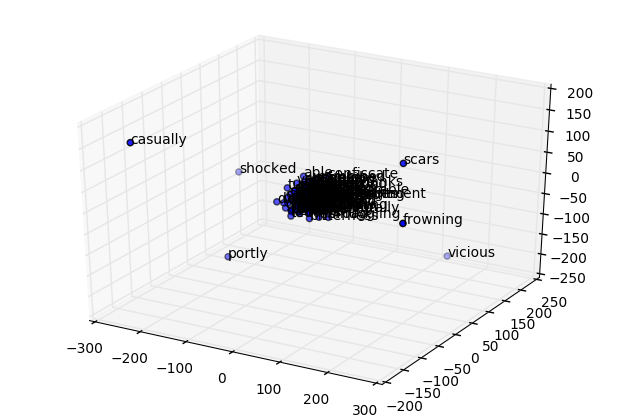

In [15]:
if not model:
    model = Word2Vec.load(model_path)

wv, vocabulary = split_embeddings(model)

tsne = TSNE(n_components=3, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(wv[:100,:])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Y[:, 0], Y[:, 1],  Y[:, 2])
# for label, x, y, z in zip(vocabulary, Y[:, 0], Y[:, 1], Y[:, 2]):
#     ax.text(x, y, z, label, size=10, zorder=1, color='k')
plt.show()